In [2]:
# import ....
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt #library to plot graphs
food =  pd.read_csv("food_nutrient_2011_13_AHS.csv", header=0,low_memory=False)
Australian_food =  pd.read_csv("8i. Australian Health Survey Classification System.csv", header=0,low_memory=False)

In [3]:
#Question 1
print("***\nQ1\nNumber of foods:",food.shape[0]) #number of rows
print("Number of attributes:",food.shape[1]) #number of columns
food.dtypes

***
Q1
Number of foods: 5740
Number of attributes: 59


Unnamed: 0                                              int64
Food ID                                                object
Survey ID                                               int64
Food Name                                              object
Survey flag                                            object
Energy, with dietary fibre (kJ)                         int64
Energy, without dietary fibre (kJ)                      int64
Moisture (g)                                          float64
Protein (g)                                           float64
Total fat (g)                                         float64
Available carbohydrates, with sugar alcohols (g)      float64
Available carbohydrates, without sugar alcohol (g)    float64
Starch (g)                                            float64
Total sugars (g)                                      float64
Added sugars (g)                                      float64
Free sugars (g)                                       float64
Dietary 

In [4]:
#Question 2
magnesium=food["Magnesium (Mg) (mg)"]
print("***\nQ2\nMedian value of Magnesium:",round(magnesium.median(),1)) #median rounding to one decimal place
moisture=food["Moisture (g)"]
print("Mean value of Moisture:",round(moisture.mean(),1)) #mean rounding to one decimal place
print("***")

***
Q2
Median value of Magnesium: 22.0
Mean value of Moisture: 56.3
***


In [5]:
#Question 3
# Part a
food['Survey ID'].astype(str) #changing the datatype to string

# Part b
food['Food Category']=food['Survey ID'].astype(str).str.slice(stop=2) #taking first to 2 numbers of each element

# Part c
count_13=food.loc[food['Food Category'] =='13', 'Food Category'].count() #checking if it is 13
count_col= food['Food Category'].count()
print('***\nQ3\n% of foods which are Cereal based products and dishes (Food category 13) =',round((count_13/count_col)*100,1))
print("***")

***
Q3
% of foods which are Cereal based products and dishes (Food category 13) = 15.9
***


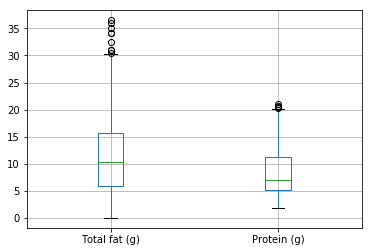

In [6]:
#Question 4
cereal_products=food.loc[food['Food Category'] =='13']
boxplot = cereal_products.boxplot(column=['Total fat (g)','Protein (g)'])

Text(0, 0.5, 'Total sugars (g)')

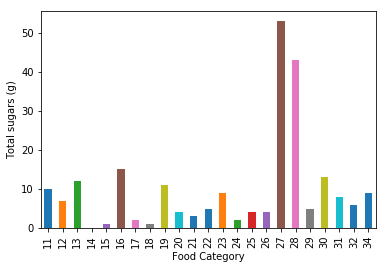

In [7]:
#Question 5
group_food_category=round(food.groupby(['Food Category']).mean()) #finding mean of each food category
plt.figure();
group_food_category['Total sugars (g)'].plot(kind='bar');
plt.ylabel('Total sugars (g)')

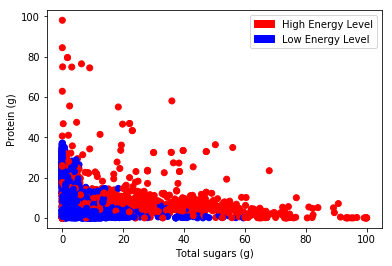

In [10]:
#Question 6
#Part a
food['EnergyLevel'] = np.where(food['Energy, with dietary fibre (kJ)']>=1000, '1', '0') #checking if energy is larger than 1000kJ

#Part b
import matplotlib.patches as mpatches

total_sugars=food['Total sugars (g)']
protein=food['Protein (g)']
plt.scatter(total_sugars, protein, color=np.where(food['EnergyLevel']=='1', 'r', 'b'))
plt.xlabel('Total sugars (g)')
plt.ylabel('Protein (g)')
red_patch = mpatches.Patch(color='red', label='High Energy Level')
blue_patch = mpatches.Patch(color='blue', label='Low Energy Level')
plt.legend(handles=[red_patch, blue_patch])

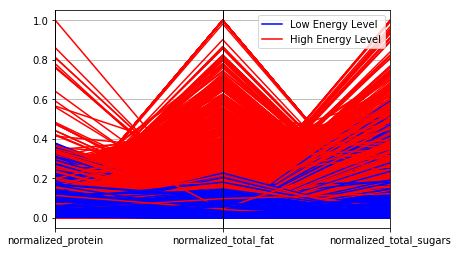

In [9]:
#Question 7
#Part a
food['normalized_protein']=(food['Protein (g)']-food['Protein (g)'].min())/(food['Protein (g)'].max()-food['Protein (g)'].min())
food['normalized_total_fat']=(food['Total fat (g)']-food['Total fat (g)'].min())/(food['Total fat (g)'].max()-food['Total fat (g)'].min())
food['normalized_total_sugars']=(food['Total sugars (g)']-food['Total sugars (g)'].min())/(food['Total sugars (g)'].max()-food['Total sugars (g)'].min())

#Part b
from pandas.plotting import parallel_coordinates
plt.figure()
color=np.where(food['EnergyLevel']=='1', 'High Energy Level', 'Low Energy Level')
food['name']= color
parallel_coordinates(food[['normalized_protein','normalized_total_fat','normalized_total_sugars','name']],'name',color=np.where(food['EnergyLevel']=='1', 'r', 'b'))
plt.show()

***
Q8
                                             Food Name  caloriecountper100g
1.                                     Dripping, beef                900.8
2.                    Fat, solid, vegetable oil based                900.8
3.                                               Lard                900.8
4.  Shortening, commercial, animal fat (for short ...                900.8
5.                             Ghee, clarified butter                900.3 
***


(-1.101783630092317,
 1.1013660247106312,
 -1.1001363255519265,
 1.1000064927113447)

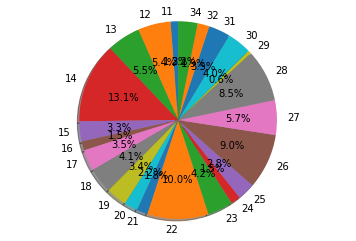

In [9]:
#Question 8
#Part a
food['caloriecountper100g']=(4 * food['Protein (g)']) + (4 * food['Available carbohydrates, without sugar alcohol (g)']) + (9 * food['Total fat (g)'])
+ 7 * (food['Alcohol (g)'])

#Part b
large5 = food.nlargest(5, 'caloriecountper100g')
large5.rename(index={2516:'1.',2518:'2.',2526:'3.',2527:'4.',2426:'5.'}, inplace=True)
print("***\nQ8\n",large5[['Food Name','caloriecountper100g']],"\n***")

#Part c
group_food_category=round(food.groupby(['Food Category']).mean())
fig1, ax1 = plt.subplots()
#plt.figure(figsize=(20,10))
ax1.pie(group_food_category['caloriecountper100g'],labels=group_food_category.index, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')

In [10]:
#Question 9


#Part a


#Part b

